In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [6]:
df_master = pd.read_csv('PGCB_Demand_Data_2021.csv',parse_dates=True,index_col='date')

In [7]:
df_master.head(24)

,year,month,day,weekday,hour,demand
date,,,,,,
2018-01-01,2018,1,1,2,0,5673.0
2018-01-01,2018,1,1,2,1,5183.0
2018-01-01,2018,1,1,2,2,4908.0
2018-01-01,2018,1,1,2,3,4786.0
2018-01-01,2018,1,1,2,4,4599.0
2018-01-01,2018,1,1,2,5,4594.0
2018-01-01,2018,1,1,2,6,4862.0
2018-01-01,2018,1,1,2,7,5191.0
2018-01-01,2018,1,1,2,8,5595.0


In [8]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28080 entries, 2018-01-01 to 2021-03-15
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     28080 non-null  int64  
 1   month    28080 non-null  int64  
 2   day      28080 non-null  int64  
 3   weekday  28080 non-null  int64  
 4   hour     28080 non-null  int64  
 5   demand   28080 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 1.5 MB


In [9]:
def plot_daily_demand(df,y):
    '''
    It returns the daily load demand vs hour for a specific year.
    
    df = dataframe
    y = year
    
    '''
    monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    dfx = df.loc[df.year==y]

    for i,m in enumerate(set(dfx.month)):
        if m in set(dfx.month):
            dfxx = dfx.loc[dfx.month==m]
            #print(monthDict[m],end=' ')
            for d in range(1,31):
                if d in set(dfxx.day):
                    #print(d)
                    dfxxx = dfxx.loc[dfxx.day==d]
                    ttl = str('Year: '+str(y)+' Month: '+str(monthDict[m])+' '+str(d))
                    plt.figure(ttl)
                    plt.plot(dfxxx.hour,dfxxx.demand)
                    #print(dfxxx)
                    plt.title(ttl)
                    

In [10]:
# plot_daily_demand(df_master,2018)

In [11]:
df_master.shape

(28080, 6)

In [12]:
D_max_daily = df_master.groupby('date').demand.max().to_numpy()
D_max_daily

array([ 7483.  ,  7645.  ,  7707.  , ...,  9635.65, 10735.7 , 11242.  ])

In [13]:
#normalizing load value
D_max = max(D_max_daily)
D_max
df = df_master.demand/D_max
df

date
2018-01-01    0.440006
2018-01-01    0.402001
2018-01-01    0.380672
2018-01-01    0.371209
2018-01-01    0.356705
                ...   
2021-03-15    0.800513
2021-03-15    0.871946
2021-03-15    0.852720
2021-03-15    0.807260
2021-03-15    0.765625
Name: demand, Length: 28080, dtype: float64

In [14]:
Y = np.array(df)
Y

array([0.4400062 , 0.40200109, 0.38067168, ..., 0.85272008, 0.80725975,
       0.76562476])

In [15]:
df_master.head()

,year,month,day,weekday,hour,demand
date,,,,,,
2018-01-01,2018,1,1,2,0,5673.0
2018-01-01,2018,1,1,2,1,5183.0
2018-01-01,2018,1,1,2,2,4908.0
2018-01-01,2018,1,1,2,3,4786.0
2018-01-01,2018,1,1,2,4,4599.0


In [16]:
X = df_master[['month','day','weekday','hour']]

In [17]:
X = X.values

In [18]:
# add season and festival info to the dataset
import datetime
iter_date = datetime.date(2018, 1, 1)
season = np.zeros((24*1170,))
festival = np.zeros((24*1170,))
for i in range(1170):
    month = iter_date.month
    day = iter_date.day
    for j in range(24):
        if (month==4) | (month==5) | ((month==3) and (day>7)) | ((month==6) and (day<8)):
            season[i*24 + j] = 0 #spring
        elif (month==7) | (month==8) | ((month==6) and (day>7)) | ((month==9) and (day<8)):
            season[i*24 + j] = 1 #summer
        elif (month==10) | (month==11) | ((month==9) and (day>7)) | ((month==12) and (day<8)):
            season[i*24 + j] = 2 #autumn
        elif (month==1) | (month==2) | ((month==12) and (day>7)) | ((month==3) and (day<8)):
            season[i*24 + j] = 3 #winter

        if (month == 7) and (day == 4):
            festival[i*24 + j] = 1
        if (month == 11) and (iter_date.weekday() == 4) and (day + 7 > 30):
            festival[i*24 + j] = 1
        if (month == 12) and (day == 25):
            festival[i*24 + j] = 1
    iter_date = iter_date + datetime.timedelta(1)
festival

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
season = np.reshape(season,(season.shape[0],1))
X_data = np.append(X,season,axis=1)
X


array([[ 1,  1,  2,  0],
       [ 1,  1,  2,  1],
       [ 1,  1,  2,  2],
       ...,
       [ 3, 15,  2, 21],
       [ 3, 15,  2, 22],
       [ 3, 15,  2, 23]])

In [20]:
X = np.reshape(X_data,(X_data.shape[0],1,X_data.shape[1]))

In [21]:
X.shape

(28080, 1, 5)

In [22]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split

#dataset splitted into train,val,test as 64%,16%,20%
X_train,X_test,Y_train,Y_test = train_test_split( X,Y,test_size=0.2, random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split( X_train,Y_train,test_size=0.2, random_state=42)

In [23]:
X_test.shape

(5616, 1, 5)

In [24]:
X_train.shape[1]

1

In [26]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional,GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

from keras.layers import TimeDistributed

AttributeError: type object 'h5py.h5a.AttrID' has no attribute '__reduce_cython__'

In [ ]:
# define LSTM
model = Sequential()
model.add(LSTM(40, input_shape=(1,5),kernel_initializer='uniform', return_sequences=True)) #input shape (1,5) to (1,6)
model.add(LSTM(40,kernel_initializer='uniform', activation='selu'))
model.add(Dropout(0.1, input_shape=(40,)))
# model.add(Dense(20, activation='selu'))
model.add(Dense(1, activation='selu'))
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
start_time = time.time()
history = model.fit(X_train, Y_train, epochs=100, shuffle=True, batch_size=18,validation_data=(X_val,Y_val))
finish_time = time.time()
print("--- %s seconds ---" % (finish_time - start_time))

In [ ]:
print((finish_time - start_time)/60,'minutes')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot([i for i in range(len(loss))],loss)
plt.plot([i for i in range(len(val_loss))],val_loss)
plt.legend(['train loss','validation loss'])

In [148]:
scores = model.evaluate(X_test, Y_test)
print("TEST MAPE :",scores[0])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [149]:
scores

NameError: name 'scores' is not defined

In [150]:
def give_daily_demand(df,y):
    '''
    It returns the daily load demand vs hour for a specific year.
    
    df = dataframe
    y = year
    
    '''
    monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    dfx = df.loc[df.year==y]

    for i,m in enumerate(set(dfx.month)):
        if m in set(dfx.month):
            dfxx = dfx.loc[dfx.month==m]
            #print(monthDict[m],end=' ')
            for d in range(1,31):
                if d in set(dfxx.day):
                    #print(d)
                    dfxxx = dfxx.loc[dfxx.day==d]
                    ttl = str('Year: '+str(y)+' Month: '+str(monthDict[m])+' '+str(d))
                    #plt.figure(ttl)
                    #plt.plot(dfxxx.hour,dfxxx.demand)
                    #print(dfxxx)
                    #plt.title(ttl)
        return dfxxx,ttl

In [151]:
dfxxx,ttl = give_daily_demand(df_master,2019)
print(dfxxx)
print(ttl)

            year  month  day  weekday  hour  demand
date                                               
2019-01-30  2019      1   30        4     0  6498.0
2019-01-30  2019      1   30        4     1  6104.0
2019-01-30  2019      1   30        4     2  5803.0
2019-01-30  2019      1   30        4     3  5613.0
2019-01-30  2019      1   30        4     4  5549.0
2019-01-30  2019      1   30        4     5  5435.0
2019-01-30  2019      1   30        4     6  5848.0
2019-01-30  2019      1   30        4     7  6271.0
2019-01-30  2019      1   30        4     8  6990.0
2019-01-30  2019      1   30        4     9  6997.0
2019-01-30  2019      1   30        4    10  6943.0
2019-01-30  2019      1   30        4    11  7032.0
2019-01-30  2019      1   30        4    12  7049.0
2019-01-30  2019      1   30        4    13  7175.0
2019-01-30  2019      1   30        4    14  6924.0
2019-01-30  2019      1   30        4    15  6933.0
2019-01-30  2019      1   30        4    16  6815.0
2019-01-30  

In [152]:
test_y = []
true_y = []
for i in range(48,24*3):
    test = X[i]
    true_y.append(Y[i]*D_max)
    test = test.reshape(1,1,5)
    y = model.predict(test)
    test_y.append(y[0][0]*D_max)

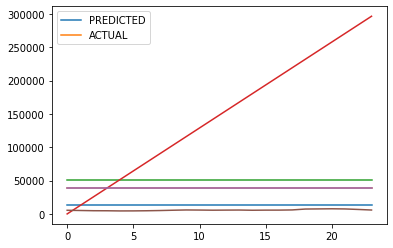

In [153]:
plt.plot(test_y)
plt.plot(true_y)
plt.legend(['PREDICTED','ACTUAL'])

In [154]:
y_pred=model.predict(X_test)
y_pred.shape
# Y_test.shape
y_pred.shape
Y_test.shape

(5616,)

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
y_pred.shape
Y_test.shape

(5616,)

In [157]:
# Y_test=Y_test.reshape(5616,1)

In [158]:
X_test.shape

(5616, 1, 5)

In [159]:
y_pred=model.predict(X_test)
y_pred.shape

(5616, 1, 5)

In [160]:
Y_test=Y_test.reshape(5616,1)
Y_test.shape


(5616, 1)

ValueError: x and y can be no greater than 2D, but have shapes (24,) and (24, 1, 5)

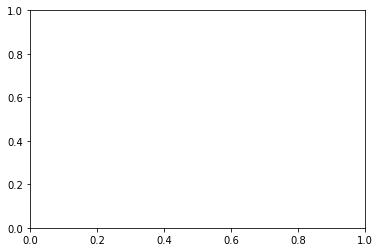

In [161]:
plt.plot(y_pred[48:24*3])
plt.plot(Y_test[48:24*3])
plt.legend(['PREDICTED(LSTM with Y_train)','ACTUAL'])

In [ ]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor( random_state = 0)
cls.fit(d2_train_dataset,Y_train)


In [ ]:
nsamples, nx, ny = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny))

In [ ]:
sk_pred=cls.predict(d2_test_dataset)

In [ ]:
plt.plot(sk_pred[48:24*3]*D_max)
plt.plot(Y_test[48:24*3]*D_max)
plt.legend(['PREDICTED(RF)','ACTUAL'])

In [ ]:
# scores(d2_test_dataset,Y_test)

In [ ]:
cls.feature_importances_

In [162]:
importance = cls.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

NameError: name 'cls' is not defined

In [ ]:
importance.shape

In [163]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'importance' is not defined

In [ ]:
cls.feature_importances_

In [ ]:
import sklearn.metrics

In [164]:
MAPE_RF=mean_absolute_percentage_error(Y_test,sk_pred)
MAPE_RF

NameError: name 'mean_absolute_percentage_error' is not defined

In [ ]:
cls.score(d2_test_dataset,Y_test)

In [165]:
mean_absolute_percentage_error(Y_test,sk_pred)

NameError: name 'mean_absolute_percentage_error' is not defined

In [ ]:
plt.plot(sk_pred[48:24*3])
plt.plot(y_pred[48:24*3])
plt.plot(Y_test[48:24*3])
plt.legend(['PREDICTED(RF)','PREDICTED(LSTM)','ACTUAL'])